In [1]:
# Uncomment these pip installs and run this cell for Colab
# !pip install setuptools==61.0.0 pyts mlflow plum-dispatch==1.7.2 torchdiffeq
# !pip install git+https://github.com/pnnl/neuromancer.git@master --ignore-requires-python --no-deps


In [2]:

from neuromancer.psl.signals import signals
import matplotlib.pyplot as plt
%matplotlib inline

# Input signals in neuromancer.psl

For a system identification task, a sequences of input signals must be generated in order to perturb the system across the dyanmic range of the state space. Neuromancer.psl has functions to generate all the standard perturbations used in system identification including:

+ Random walk: walk
+ White noise: noise
+ Random step functions: step
+ Randomly offset periodic functions (sin, cos, square, sawtooth): periodic
+ Sum of sines: sines
+ Auto-regressive moving average: arma
+ Cubic spline interpolation between randomly sampled points: splines

All input signal generator functions have the arguments: 

+ nsim: Length of input signal time series
+ d: Dimension of input signal time series
+ min: Minimum value for input signal time series
+ max: Maximum value for input signal time series

All signals are by default scaled to between min and max, however the unbounded signals white noise, random walk, and ARMA
have a bounded argument which can be set to false if an unbounded signal is desired. 

Below are plots of each signal time series generated with nsim=1000 and d=3.

In [3]:
signals

{'sin': functools.partial(<function periodic at 0x7f9275653f40>, form='sin'),
 'square': functools.partial(<function periodic at 0x7f9275653f40>, form='square'),
 'sawtooth': functools.partial(<function periodic at 0x7f9275653f40>, form='sawtooth'),
 'walk': <function neuromancer.psl.signals.walk(nsim, d, min=0.0, max=1.0, sigma=0.05, bound=True)>,
 'noise': <function neuromancer.psl.signals.noise(nsim, d, min=0.0, max=1.0, sigma=0.05, bound=True)>,
 'step': <function neuromancer.psl.signals.step(nsim, d, min=0.0, max=1.0, randsteps=30, values=None)>,
 'spline': <function neuromancer.psl.signals.spline(nsim, d, min=0.0, max=1.0, values=None, n_interpolants=30)>,
 'sines': <function neuromancer.psl.signals.sines(nsim, d, min=0.0, max=1.0, periods=30, nwaves=20, form='sin')>,
 'arma': <function neuromancer.psl.signals.arma(nsim, d, min=0.0, max=1.0, q=10, p=10, bound=True)>,
 'prbs': <function neuromancer.psl.signals.prbs(nsim, d, min=0.0, max=1.0, p=0.9)>}

sin (1000, 3)


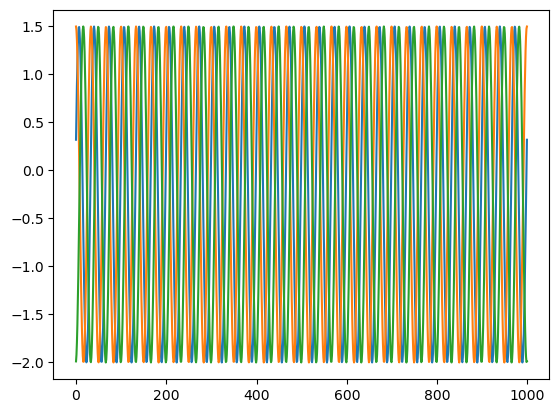

square (1000, 3)


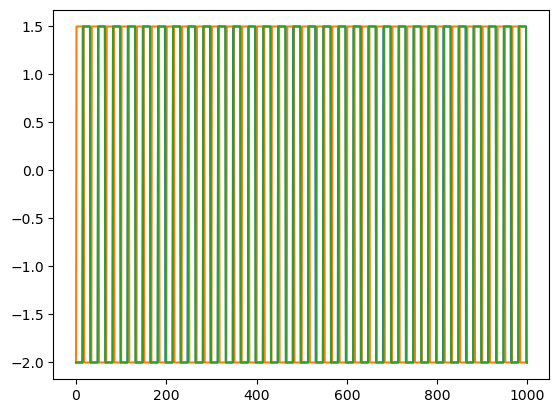

sawtooth (1000, 3)


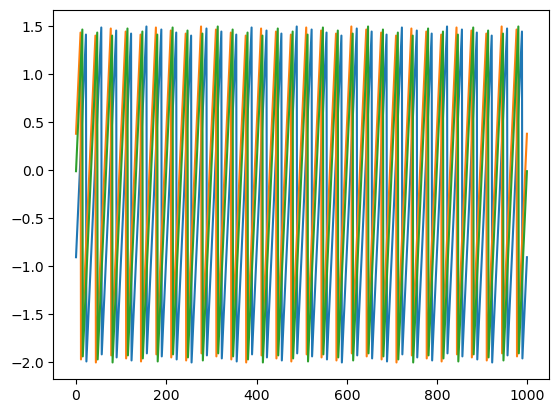

walk (1000, 3)


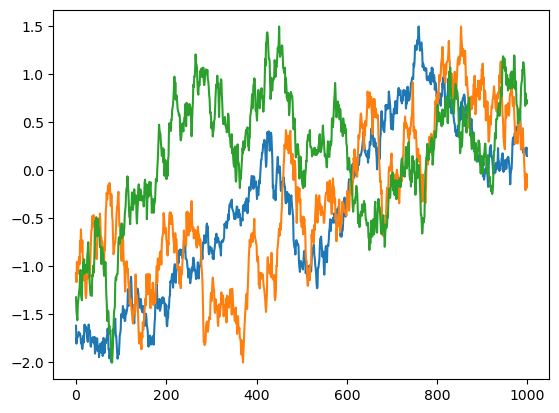

noise (1000, 3)


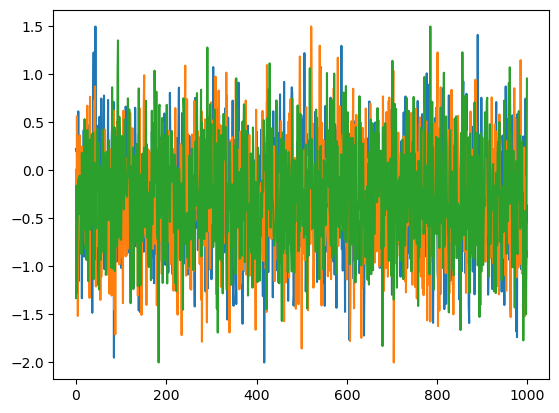

step (1000, 3)


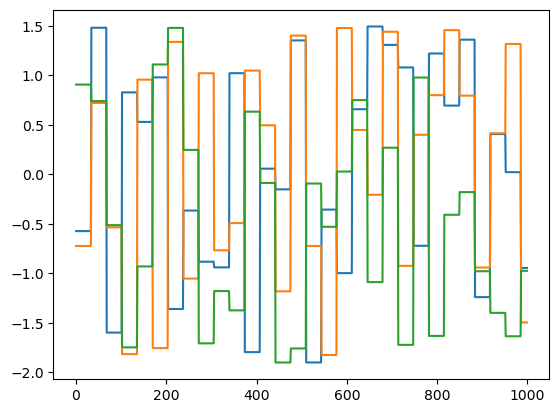

spline (1000, 3)


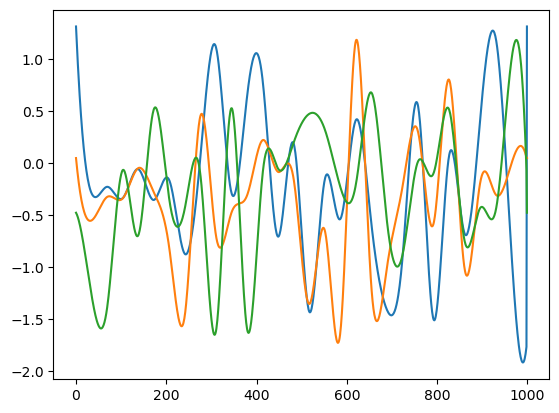

sines (1000, 3)


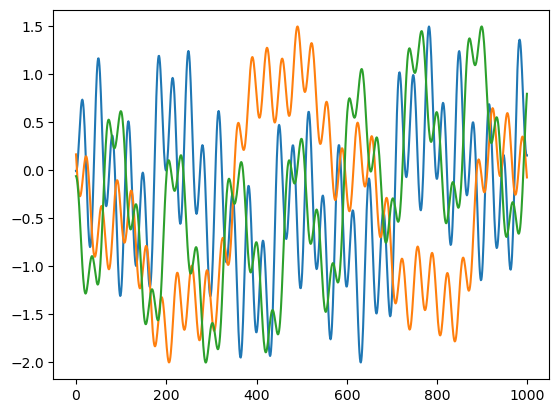

arma (1000, 3)


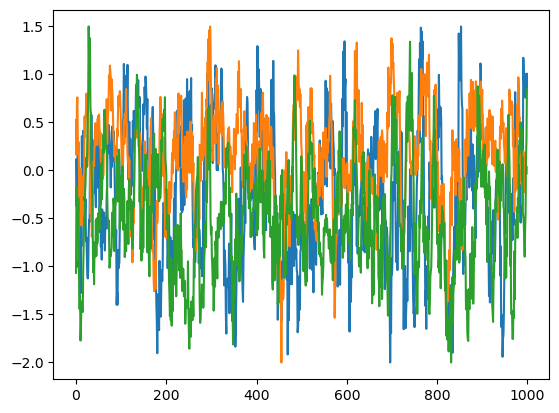

prbs (1000, 3)


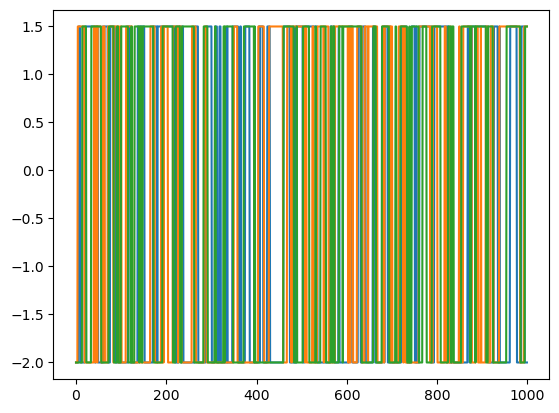

In [4]:
for n, s in signals.items():
    x = s(1000, 3, min=-2., max=1.5)
    print(n, x.shape)
    plt.plot(x)
    plt.show()
    plt.close()

# Perturbing a PSL system

Now we can simulate a nonautonomus system under a range of different perturbations to see how it reacts. 
    

In [11]:
from neuromancer.psl.nonautonomous import TwoTank

sys = TwoTank()

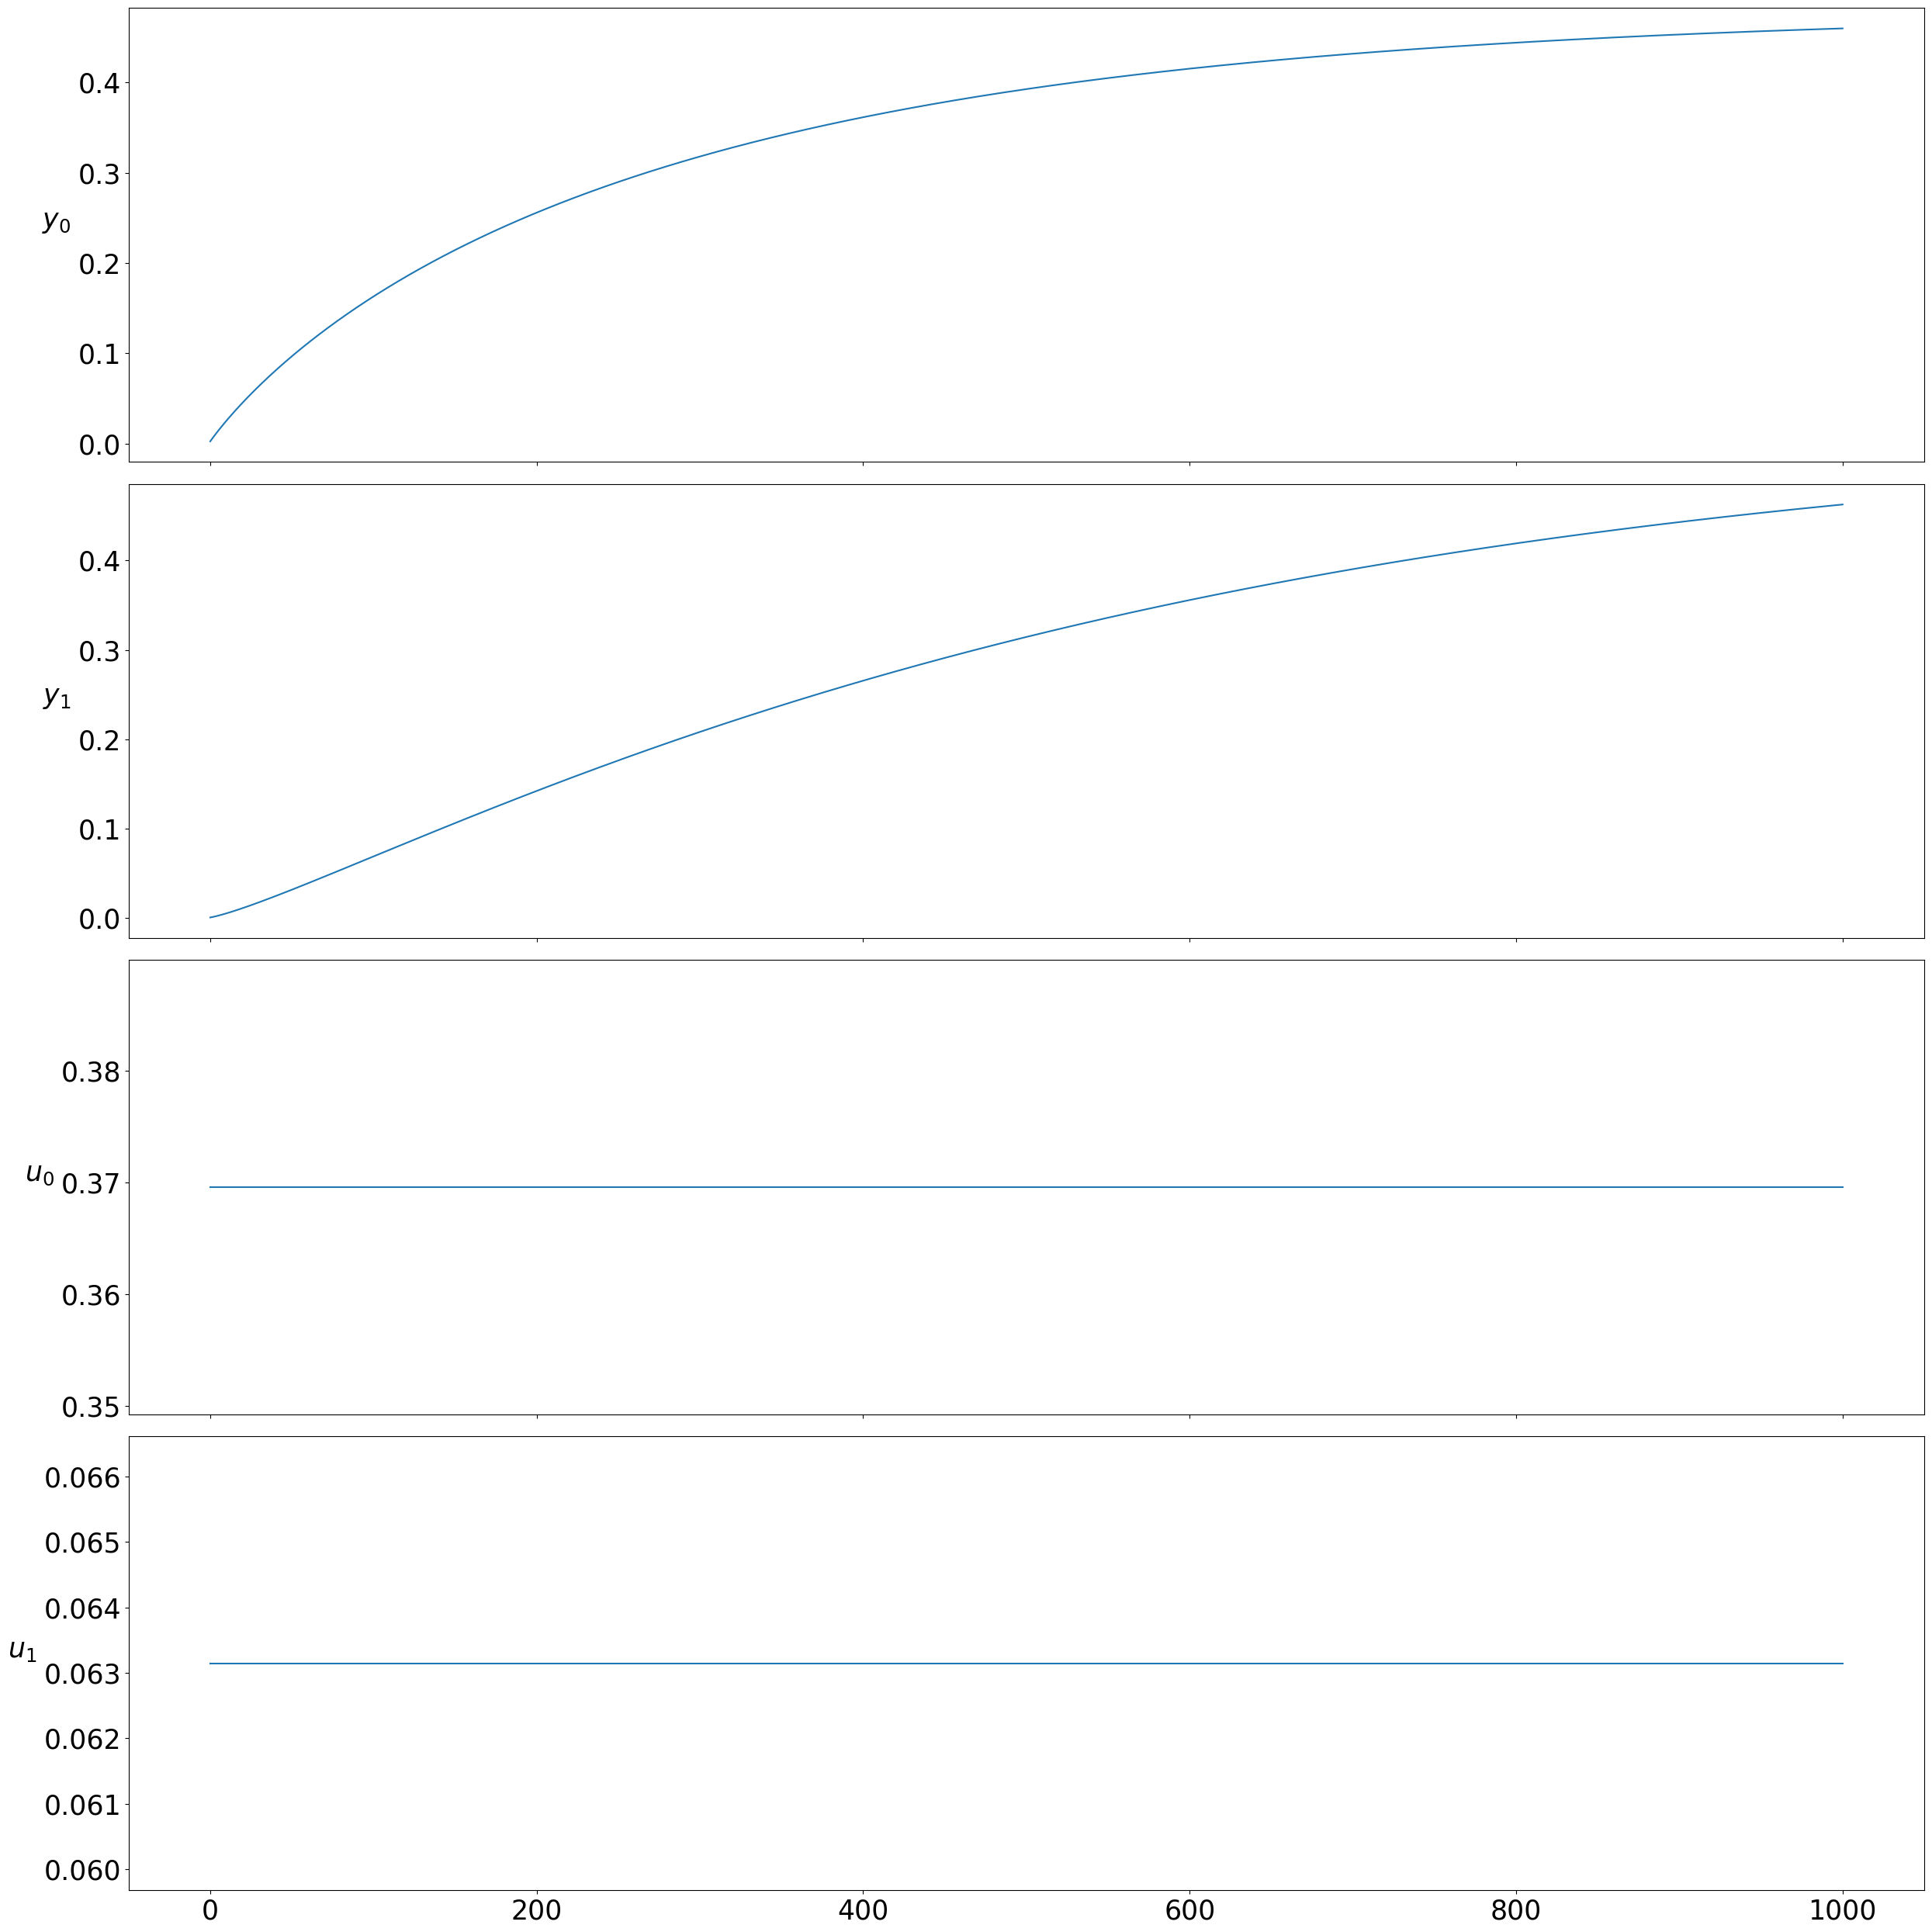

In [12]:
# This is the system under the default initial condition and sequence of control actions
sys.show()

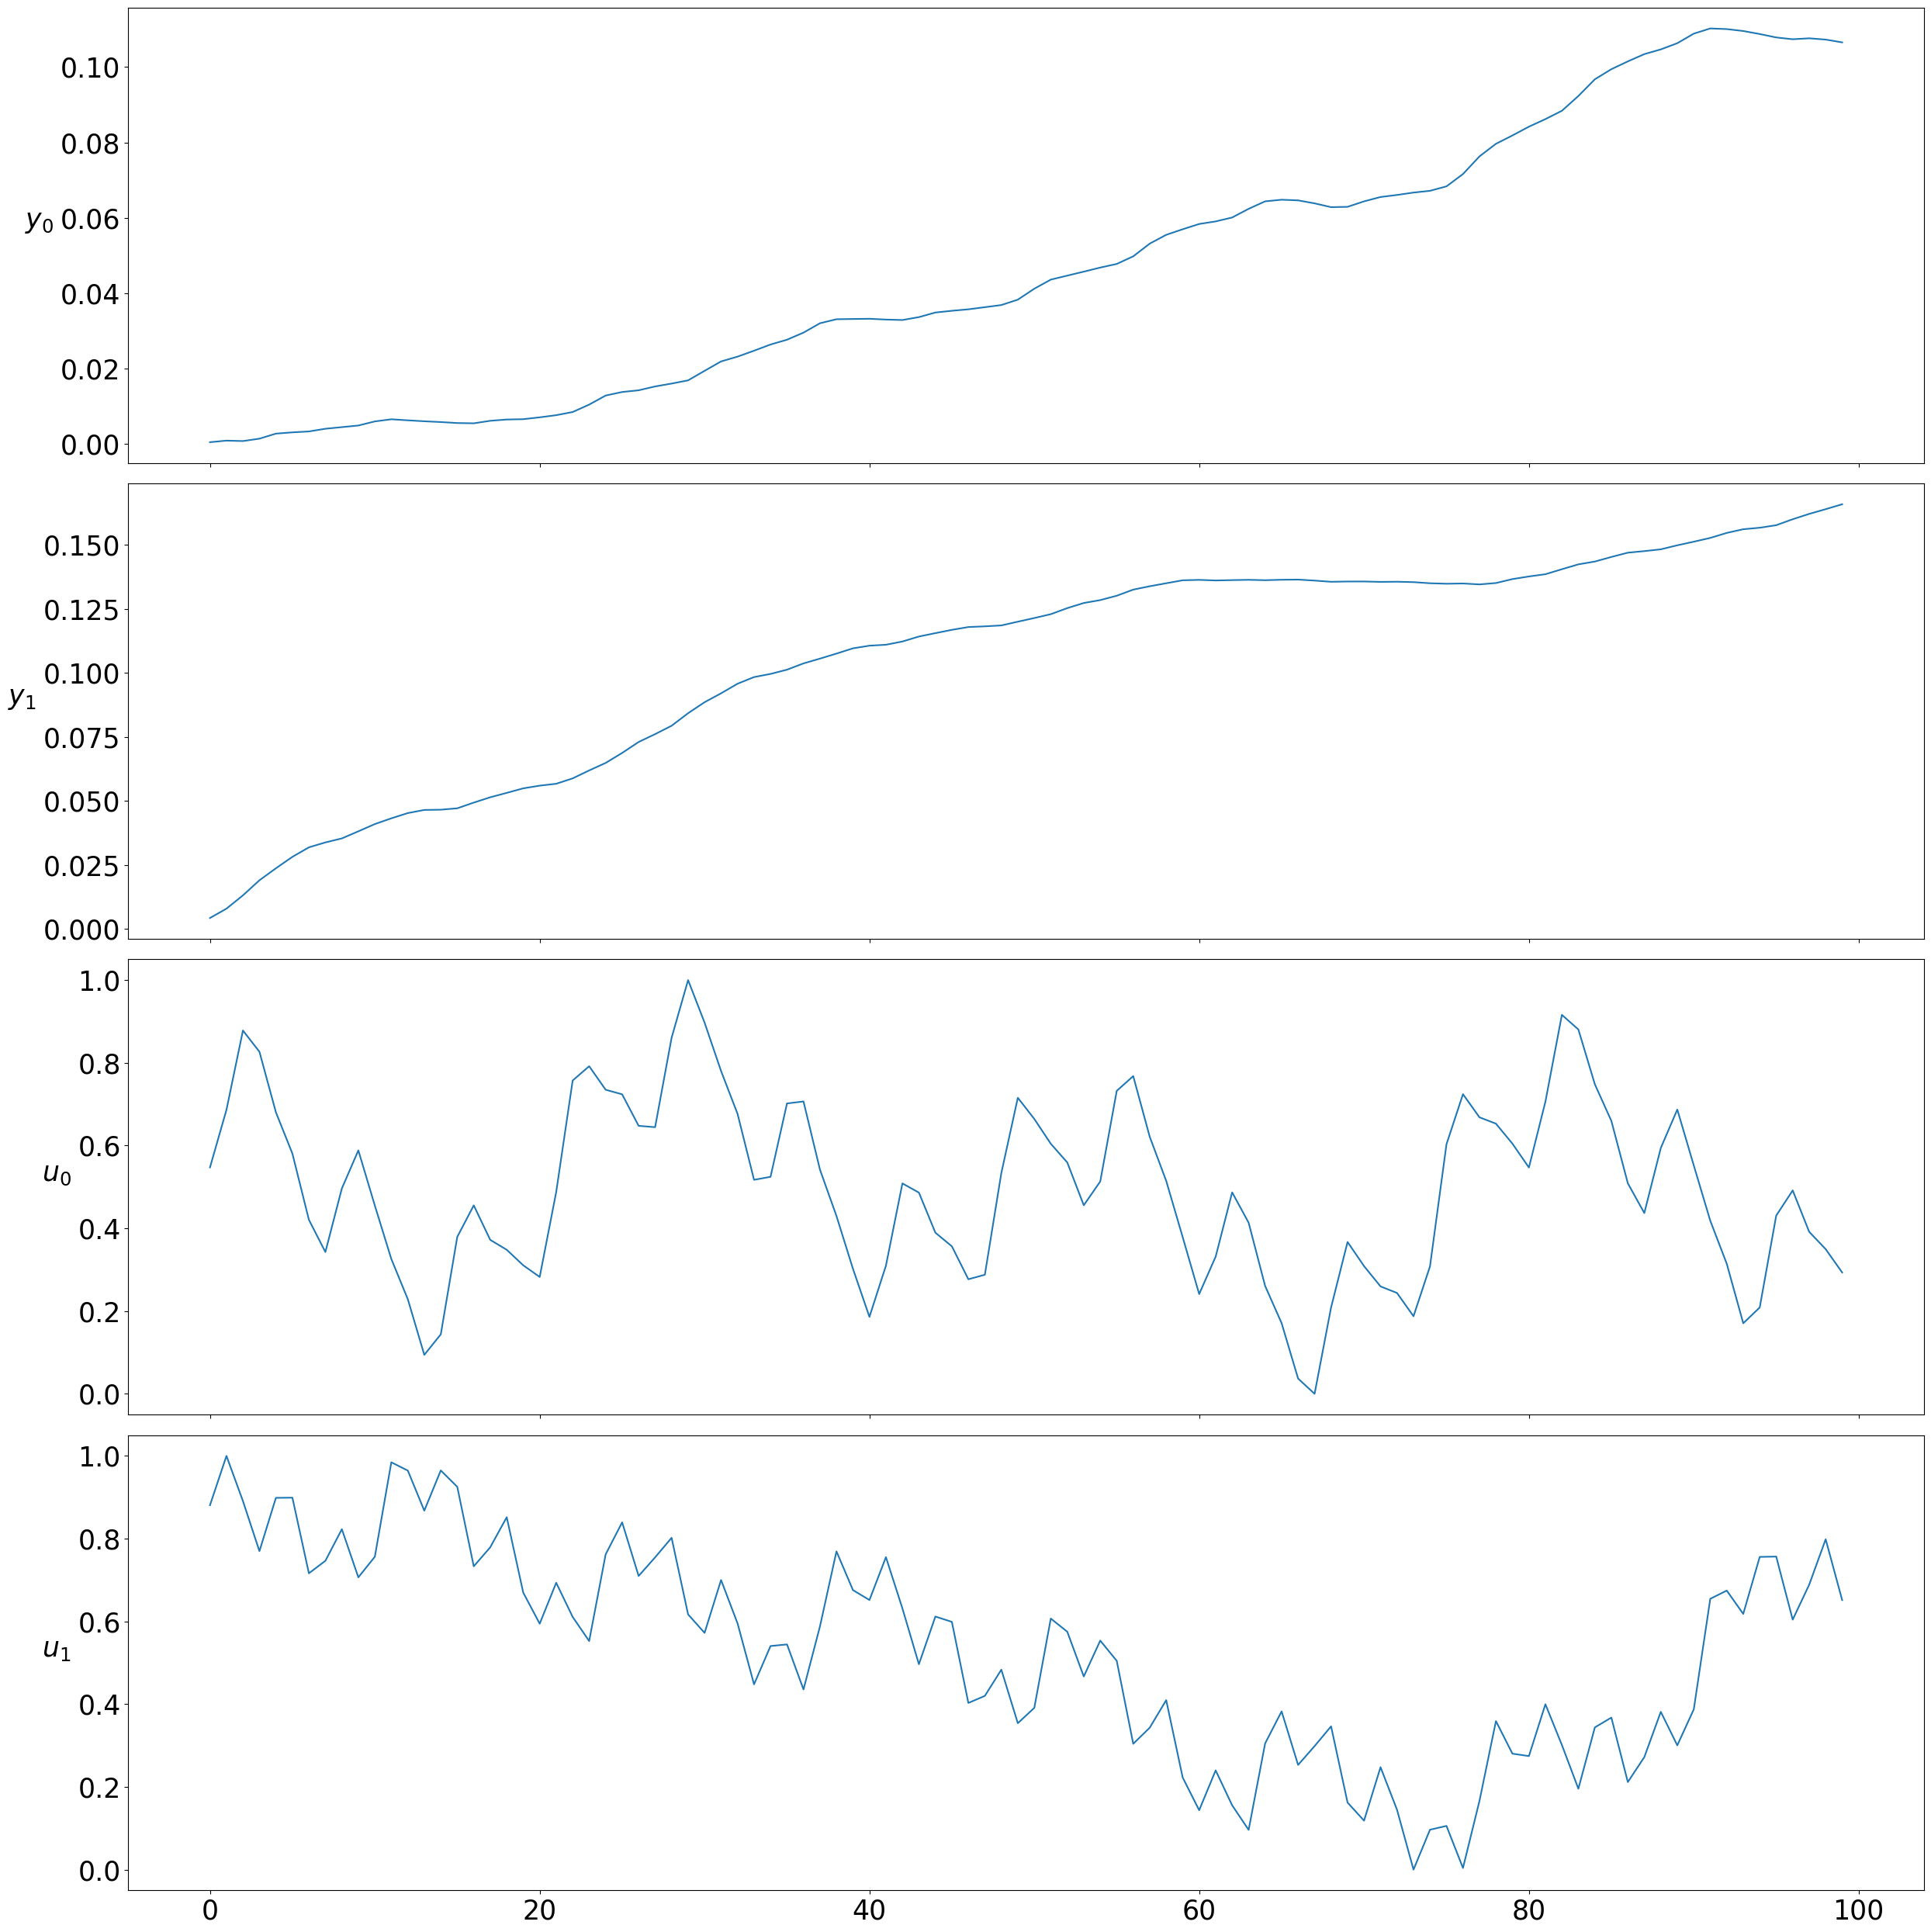

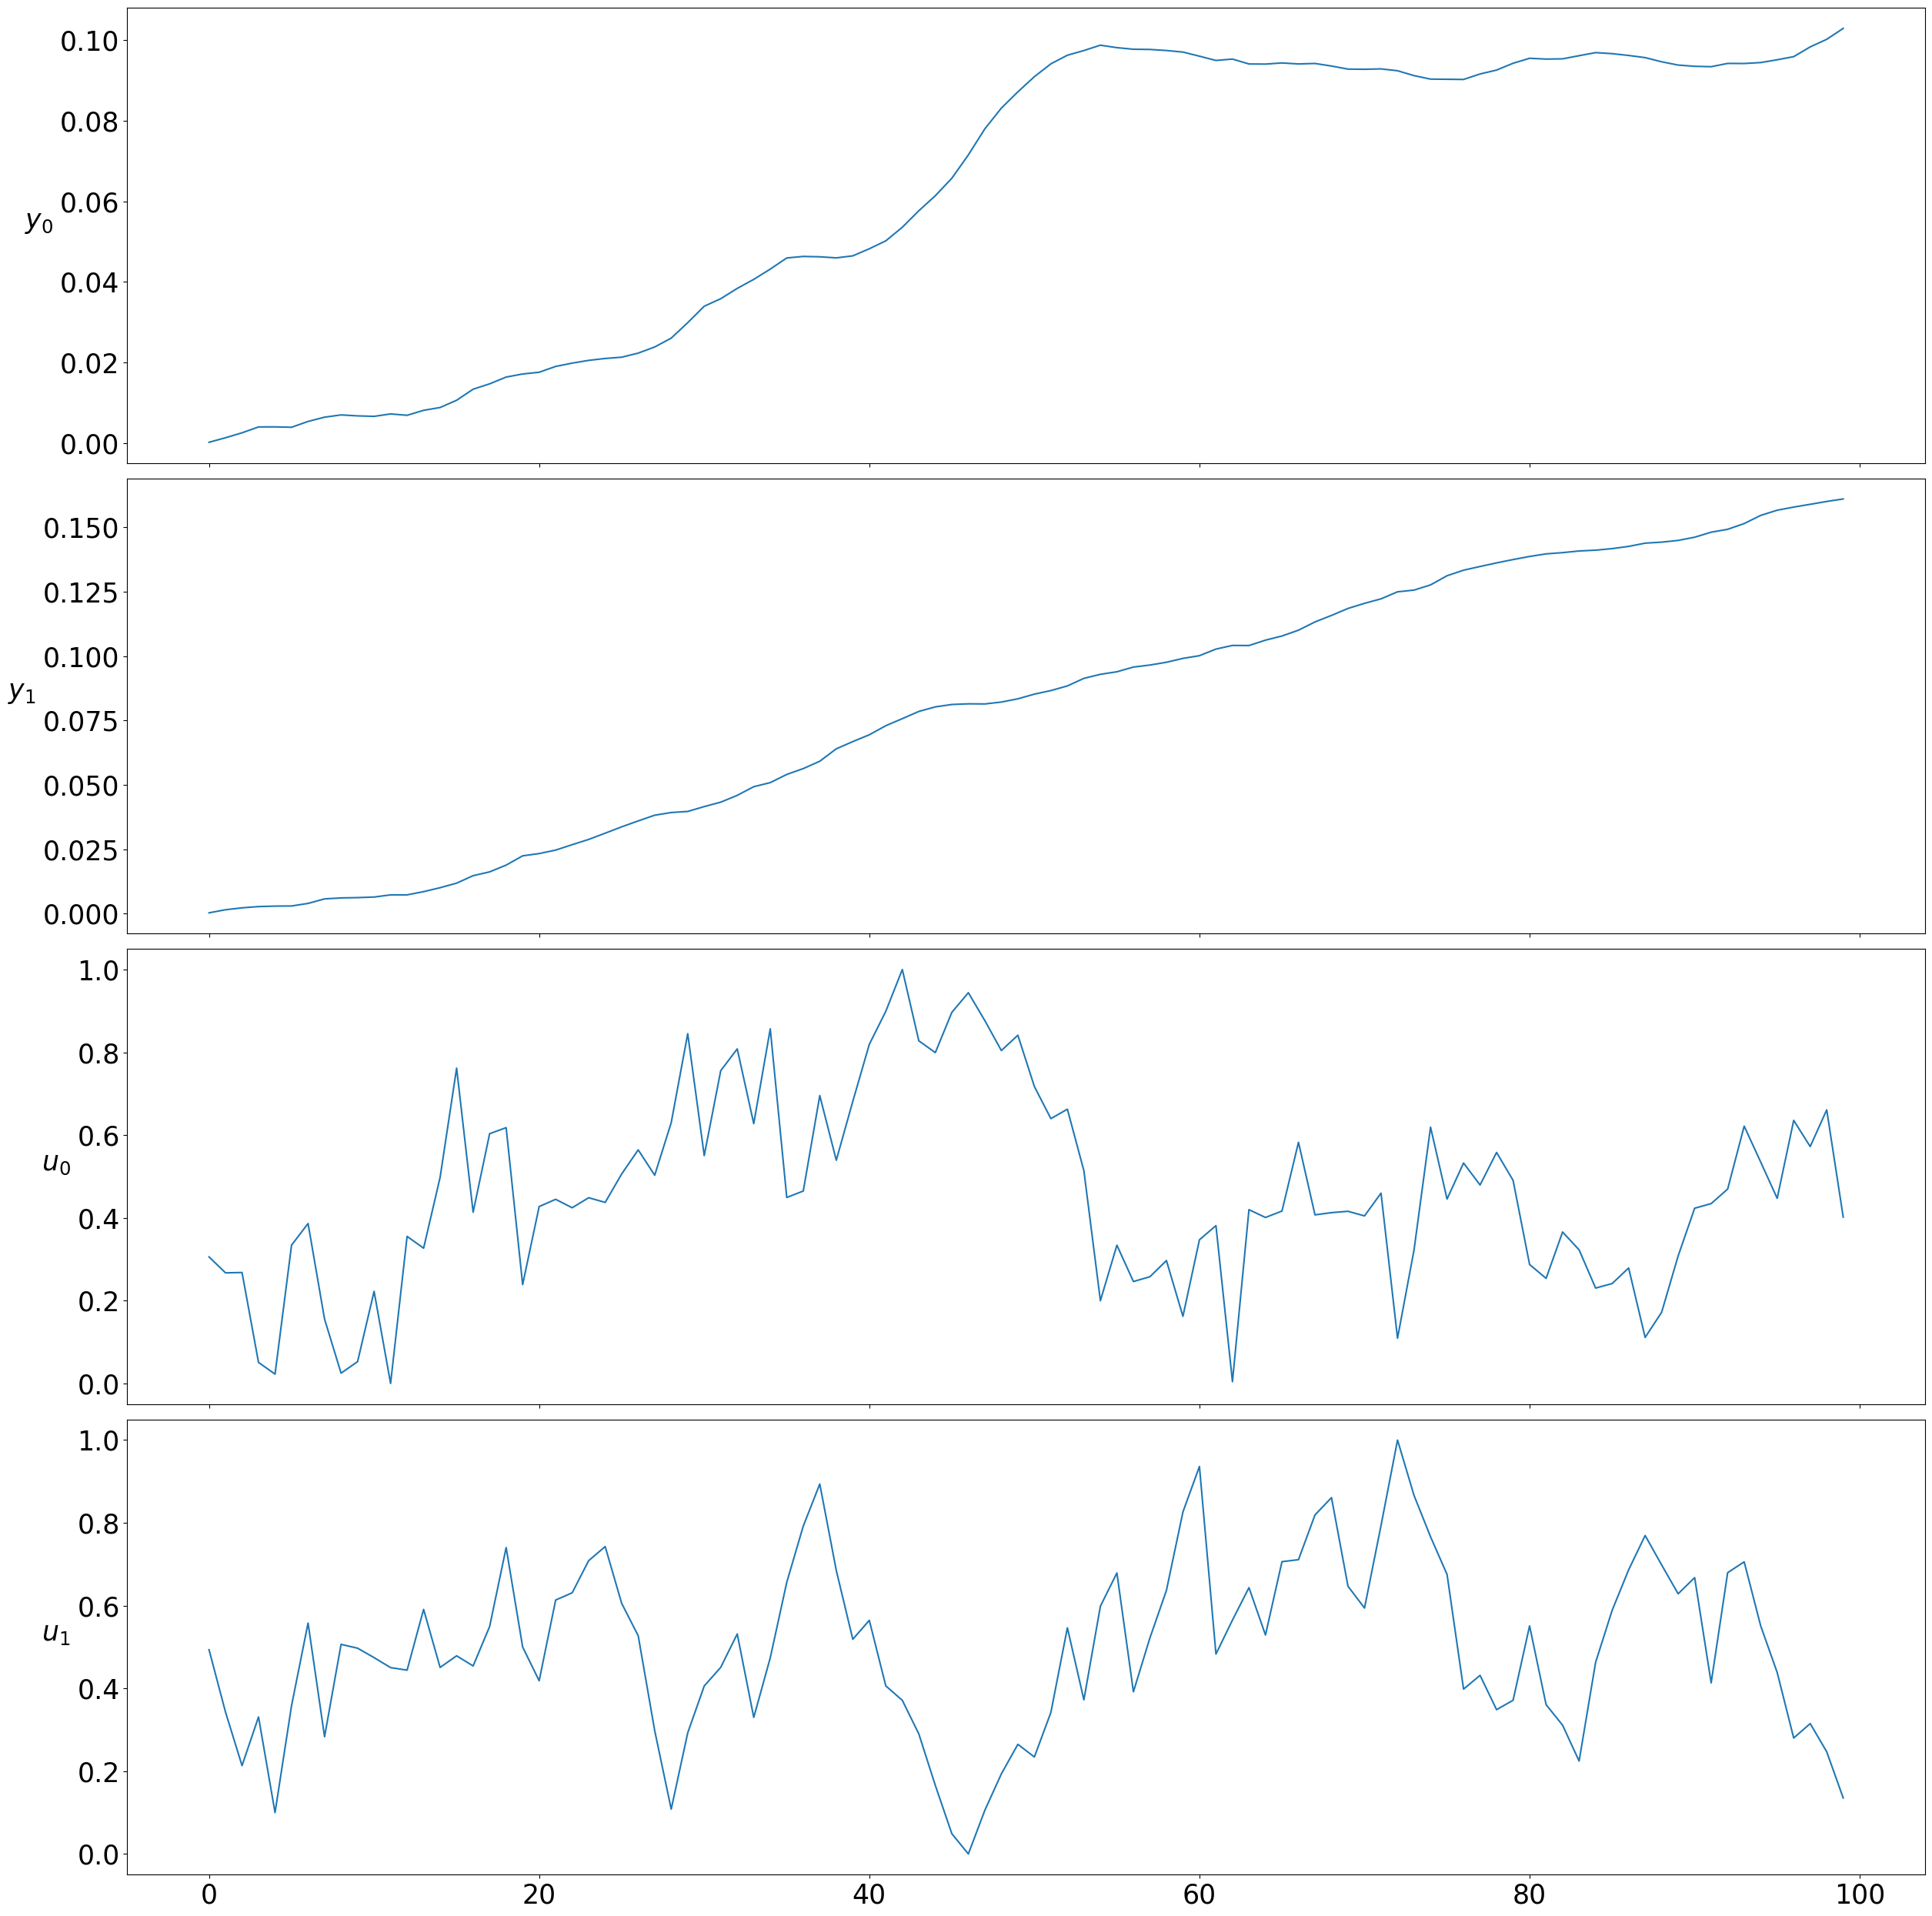

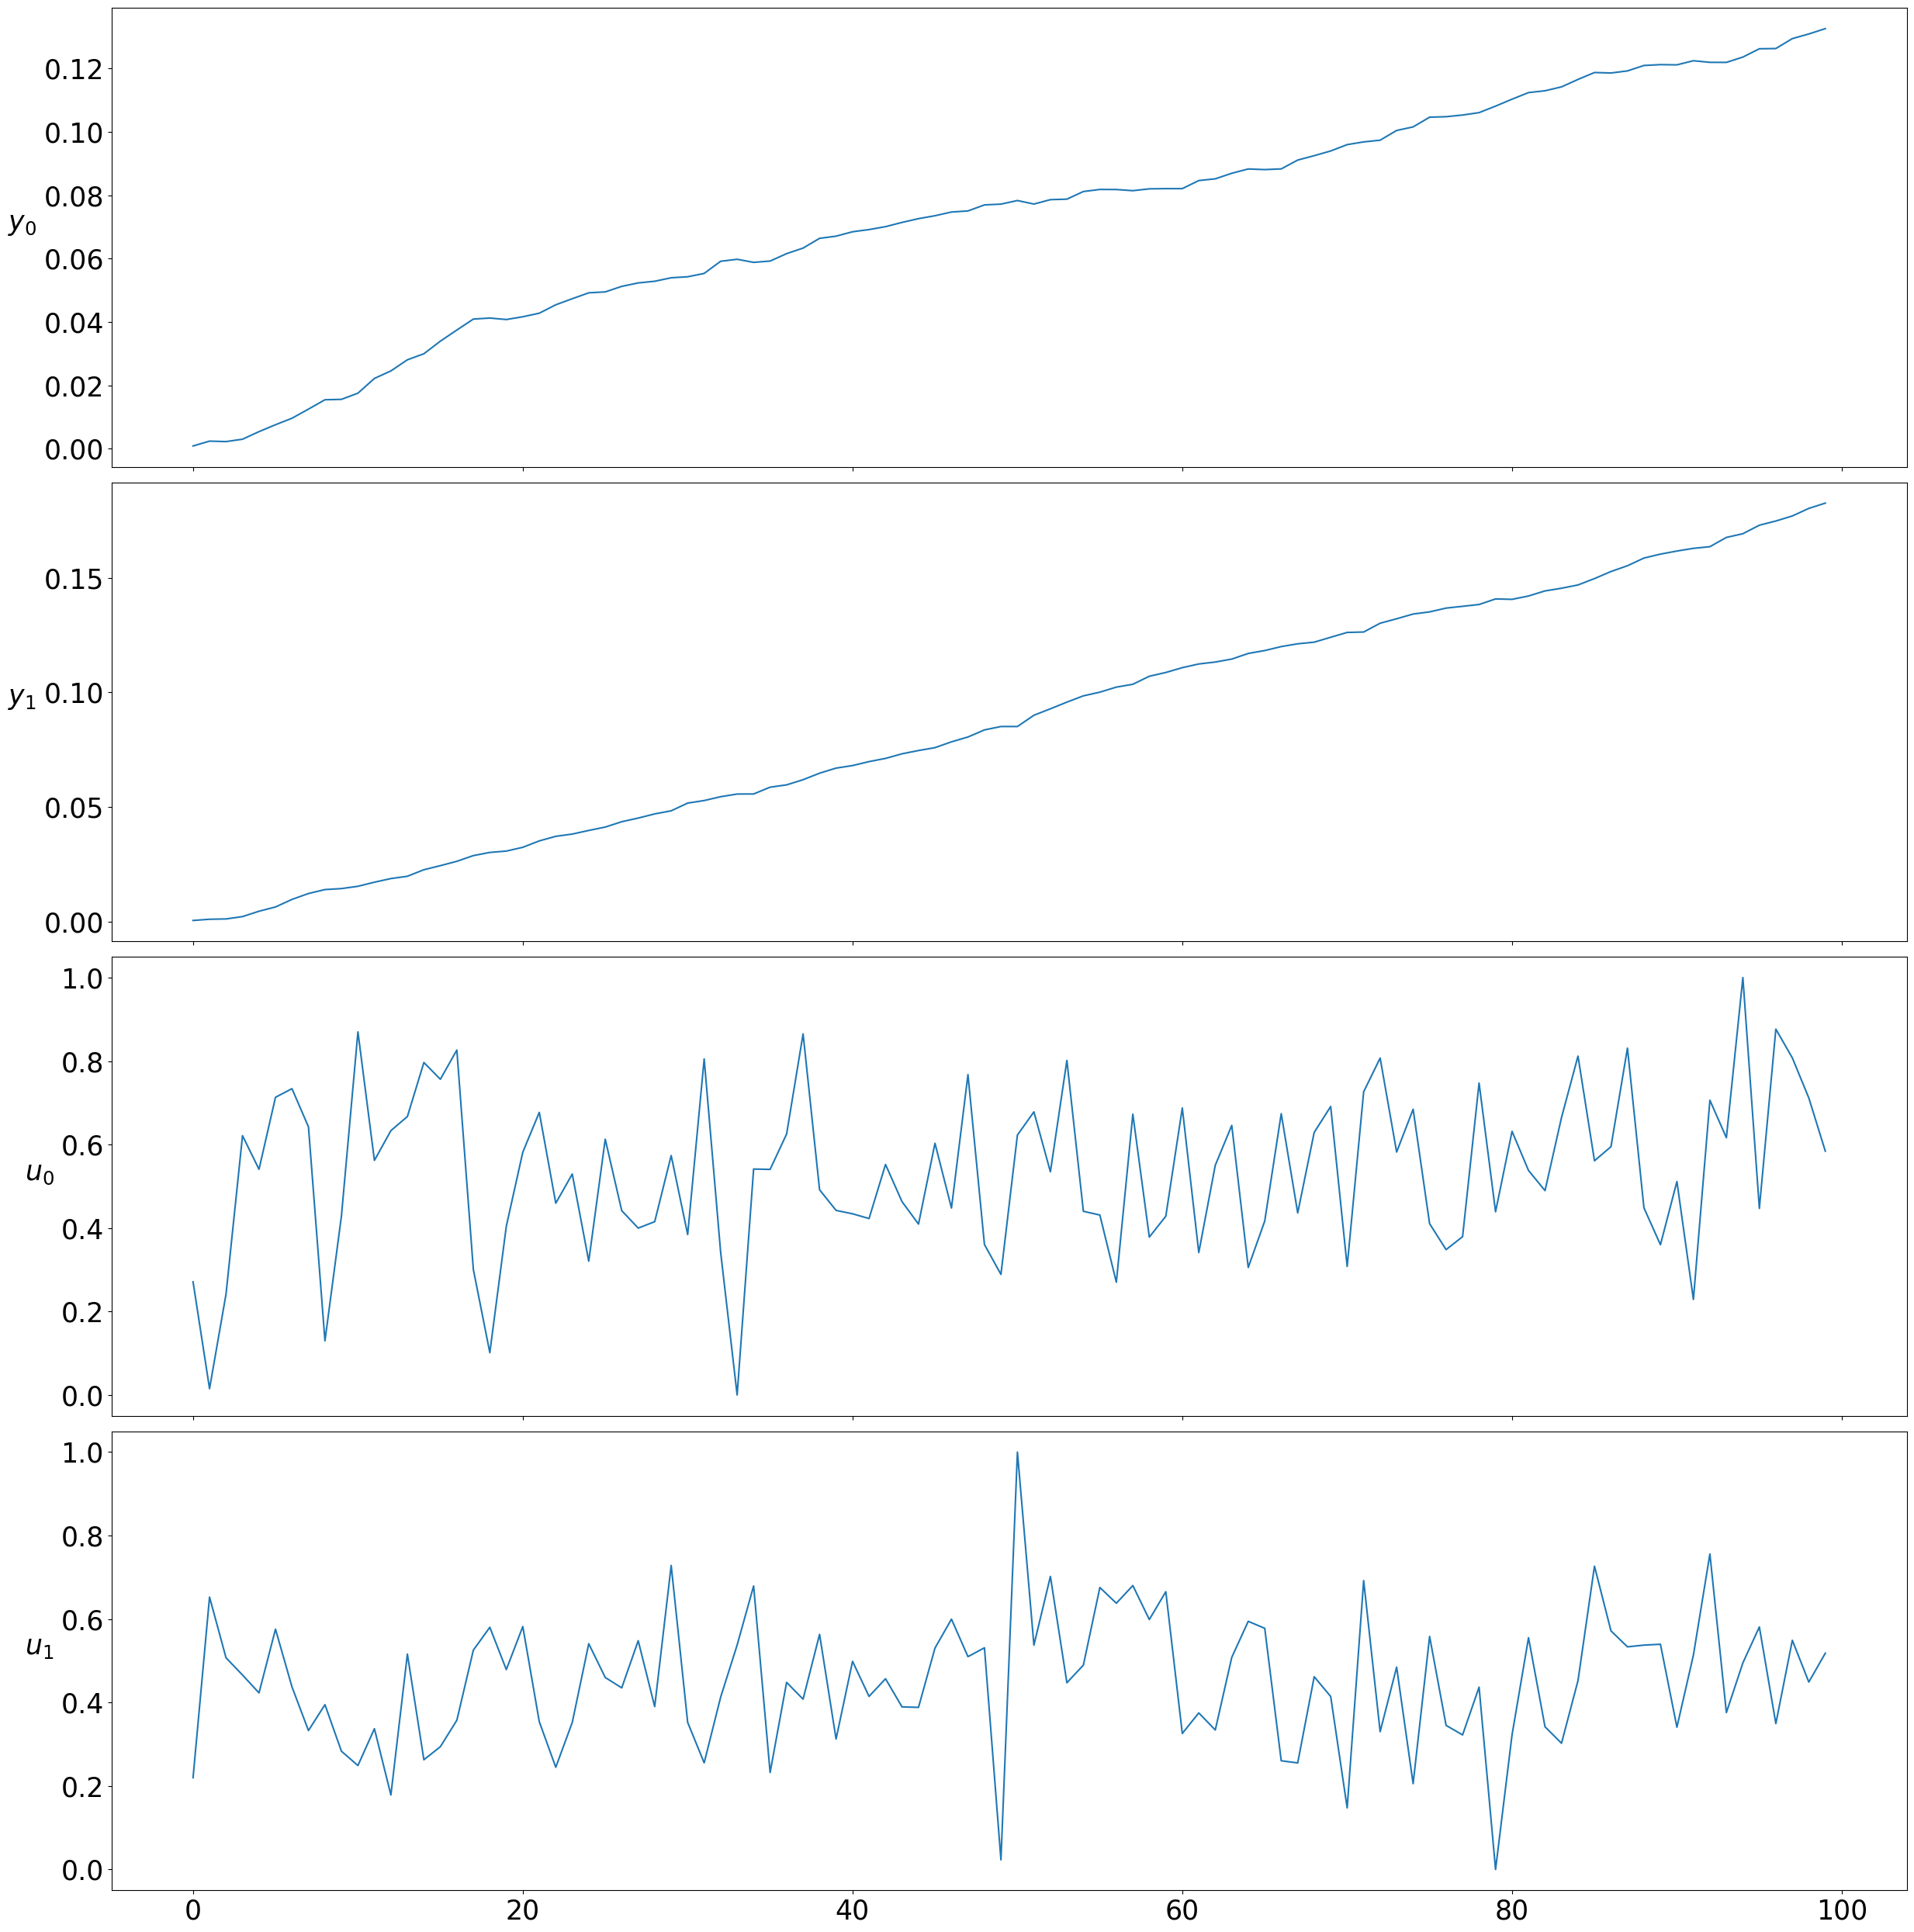

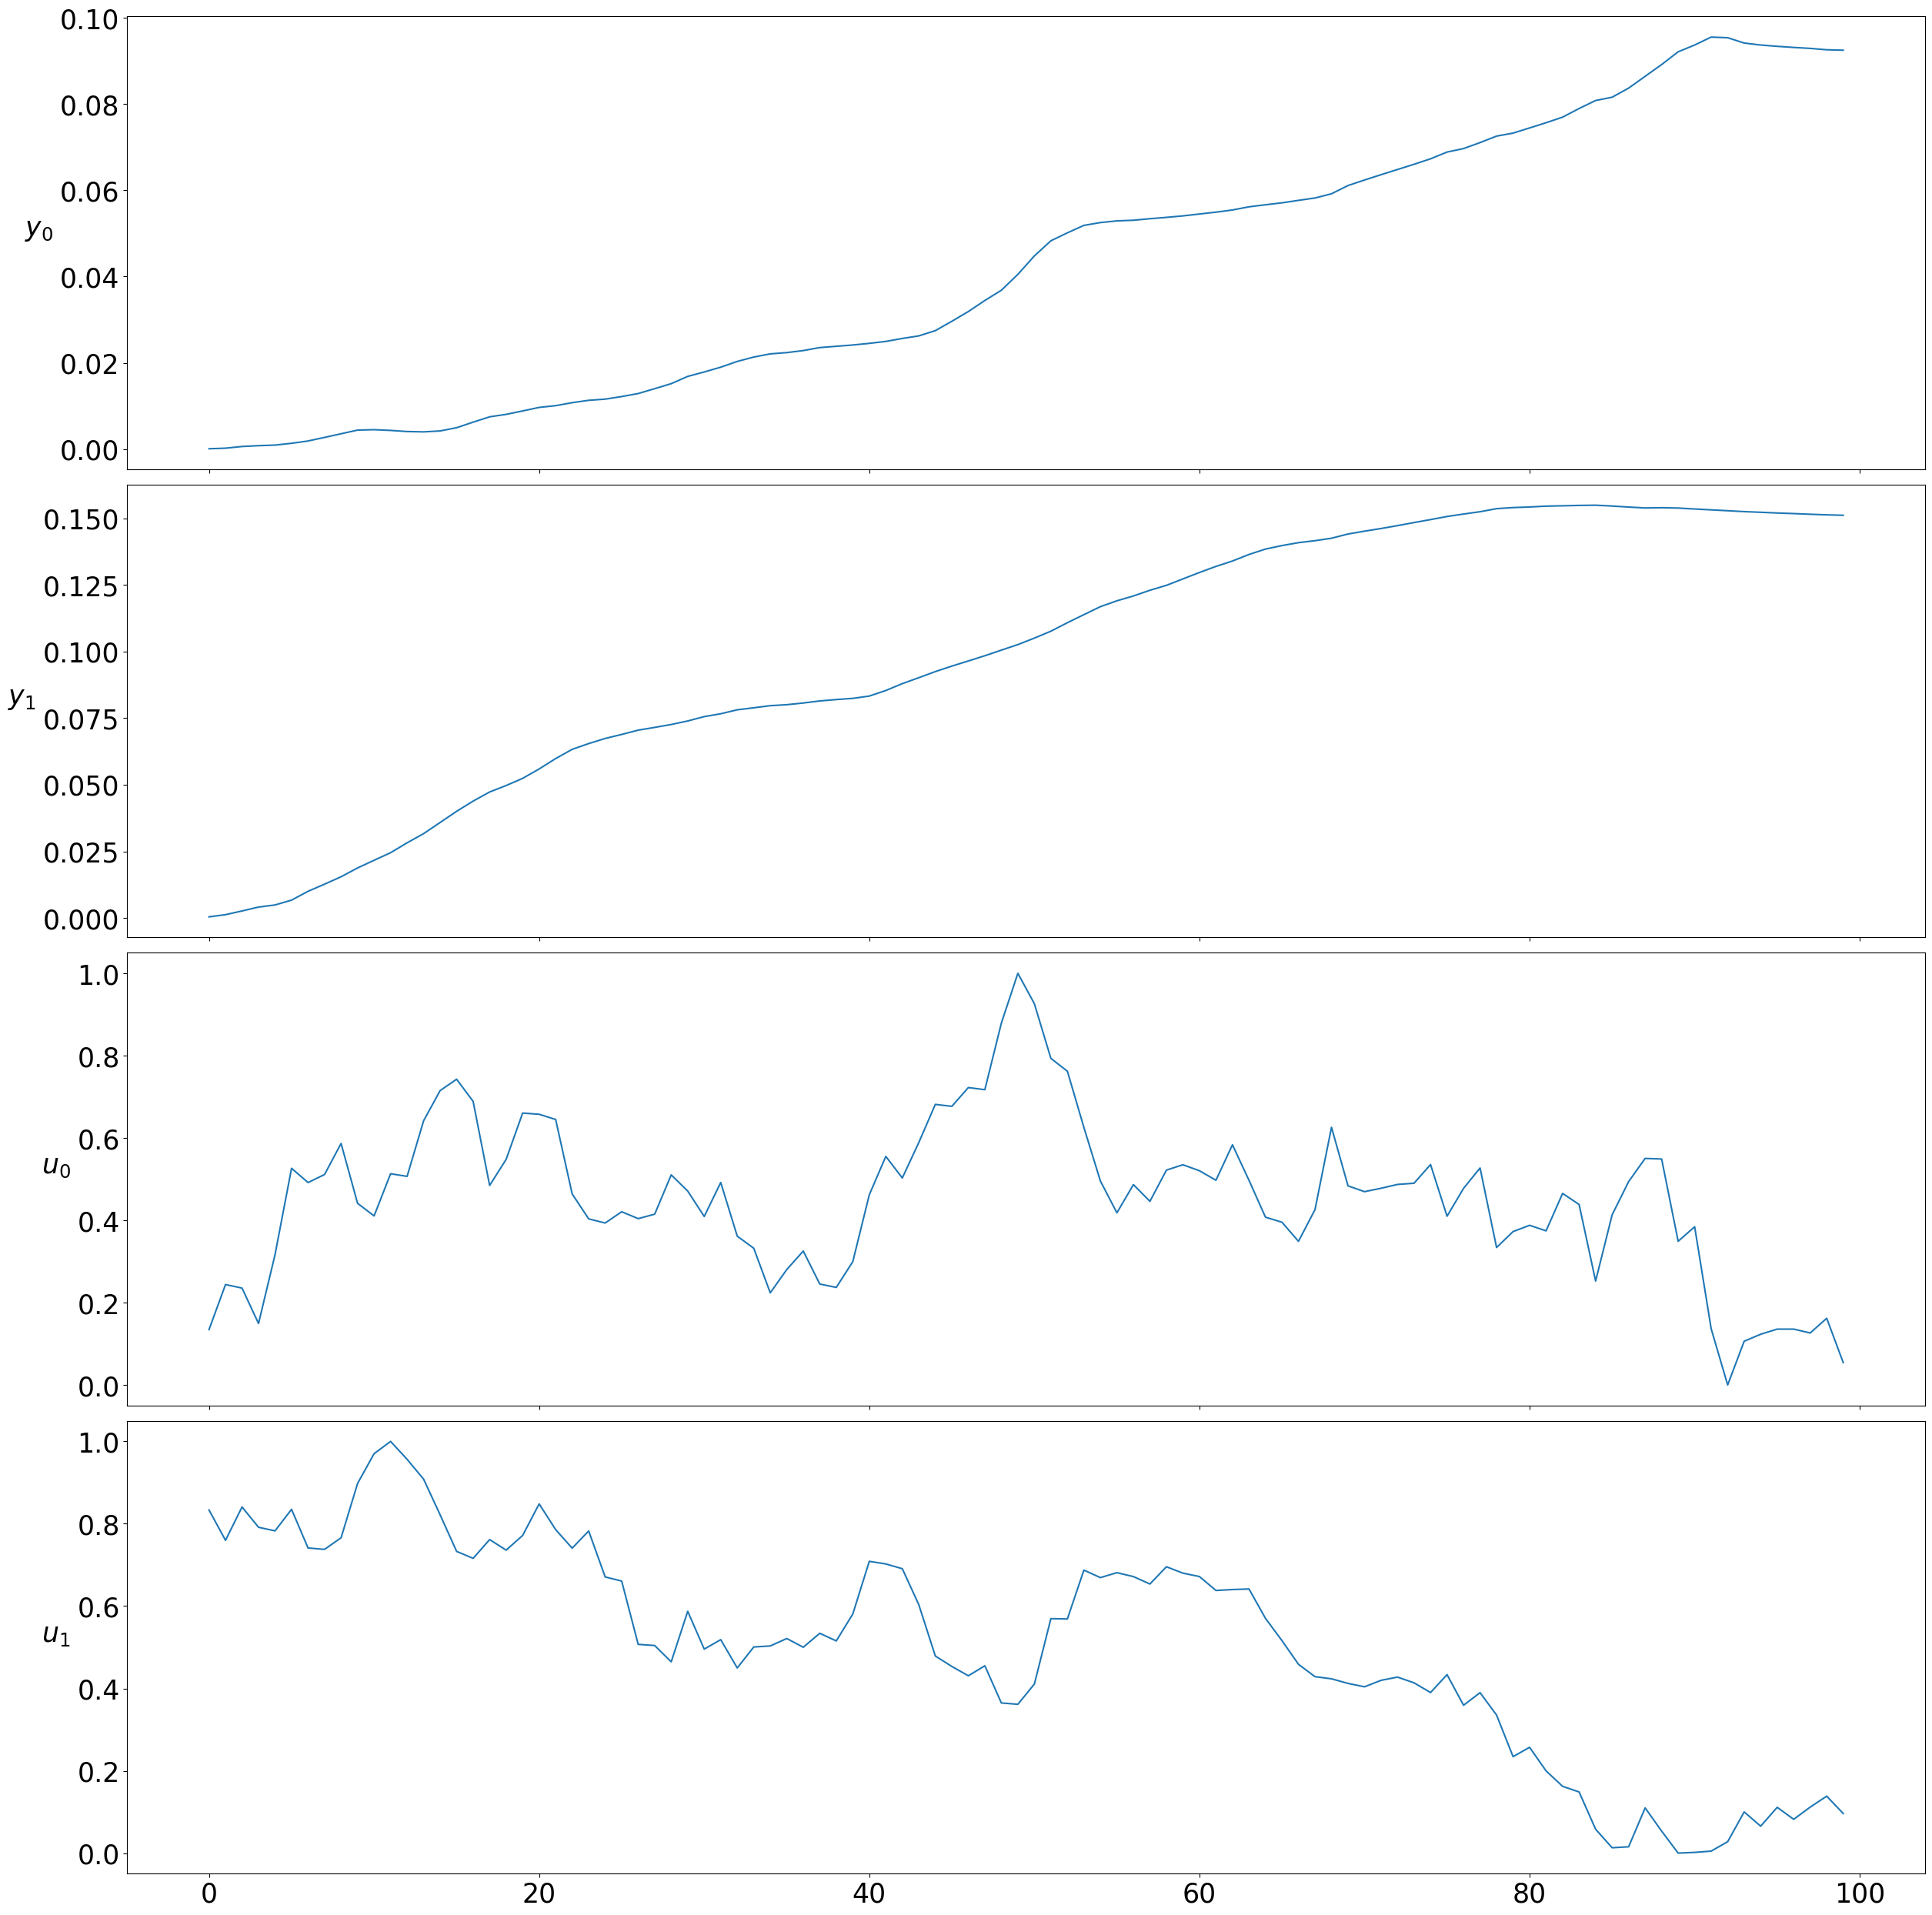

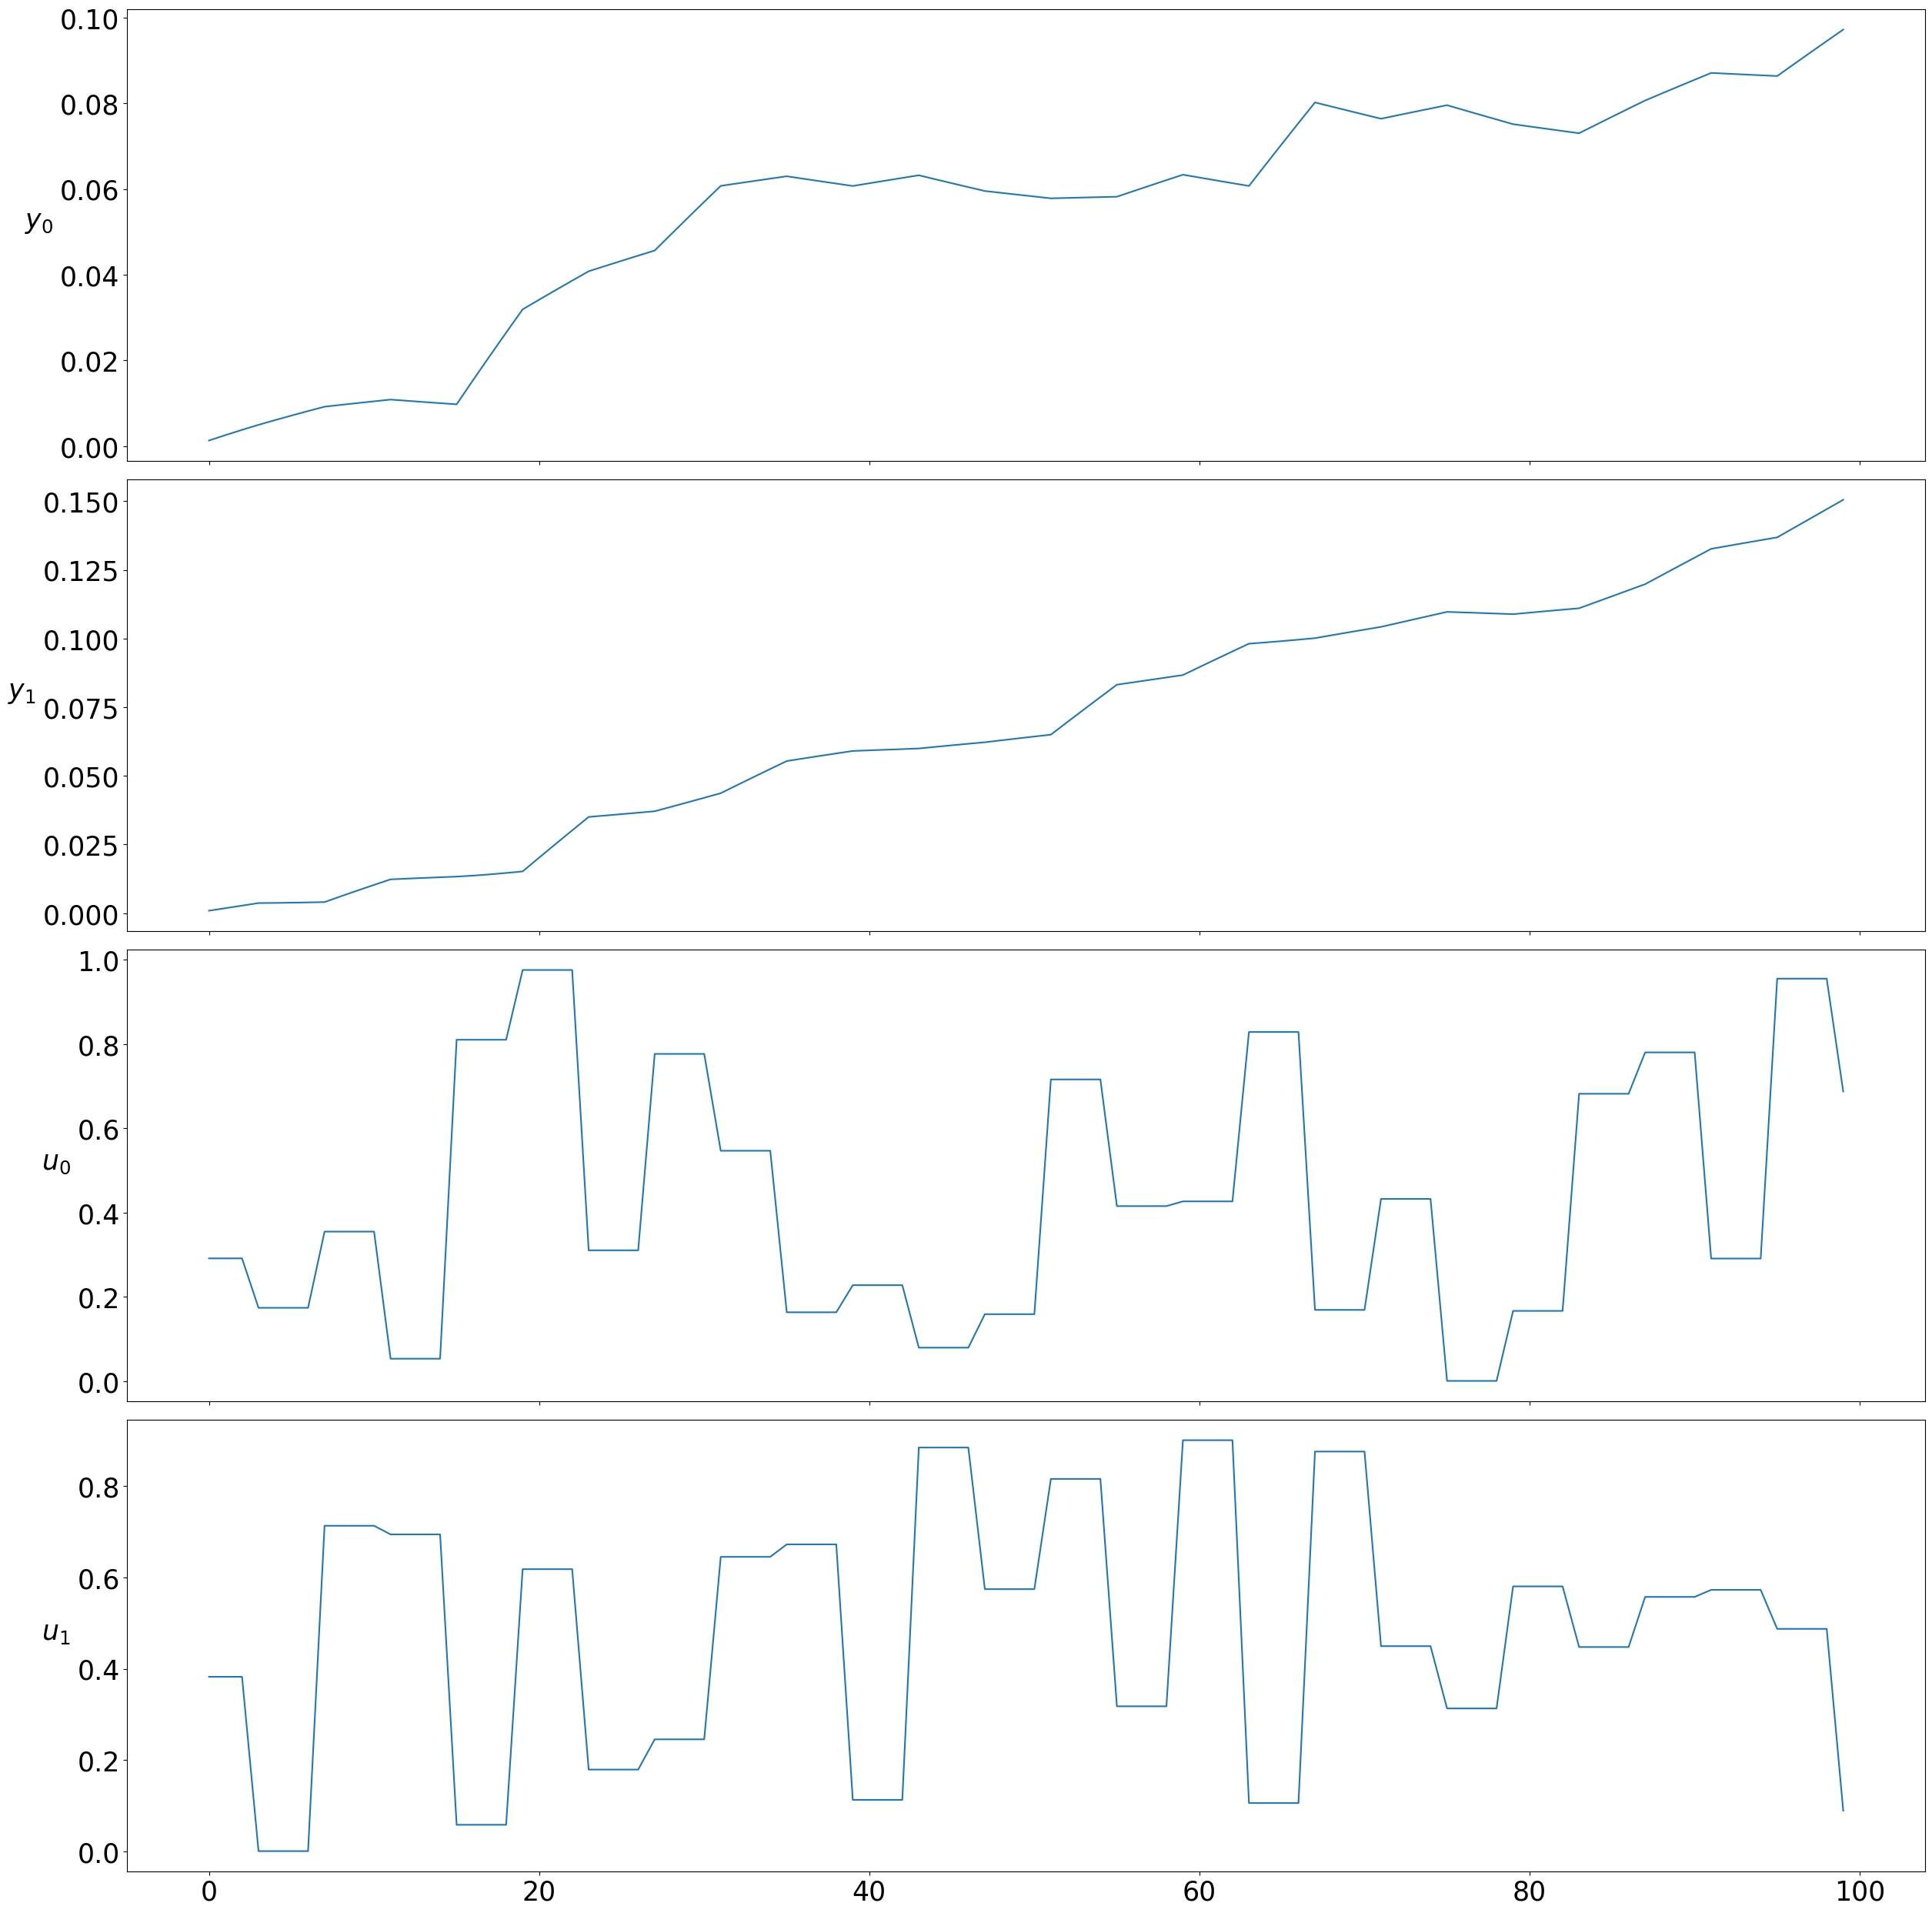

In [15]:
from neuromancer.psl.signals import sines, arma, noise, walk, step

for signal in [sines, arma, noise, walk, step]:
    sys.show(sys.simulate(nsim=100, x0=sys.x0, U=signal(101, d=sys.nu, min=0., max=1.)))